In [234]:
# Author: Matt Williams
# Version: 1/31/2023

# Dataset = https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

import os
import pandas
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt


CWD = os.path.abspath(os.getcwd())
STROKE_CSV = os.path.join(CWD, "healthcare-dataset-stroke-data.csv")

stroke_df = pandas.read_csv(STROKE_CSV, index_col=None)
print(stroke_df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [235]:
# dropping id column because it is not needed.
stroke_df.drop(columns="id", inplace=True)
print(stroke_df.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  


In [236]:
# Find which columns have missing values
print(F"Number of rows in original dataset: {len(stroke_df)}")
for column in stroke_df.columns:
    print(f"{column} non-null value count: {stroke_df[column].count()}")

Number of rows in original dataset: 5110
gender non-null value count: 5110
age non-null value count: 5110
hypertension non-null value count: 5110
heart_disease non-null value count: 5110
ever_married non-null value count: 5110
work_type non-null value count: 5110
Residence_type non-null value count: 5110
avg_glucose_level non-null value count: 5110
bmi non-null value count: 4909
smoking_status non-null value count: 5110
stroke non-null value count: 5110


In [237]:
# Only BMI values are missing.
# We can't reliably fill these in, so we are going to remove these from the dataset.
stroke_df = stroke_df[stroke_df["bmi"].notnull()]
print(f"Number of rows after removing null values: {len(stroke_df)}")

Number of rows after removing null values: 4909


In [238]:
# Need to make sure all values in each column are numeric
for column in stroke_df.columns:
    if stroke_df[column].dtype == object:
        unique_values = stroke_df[column].unique()
        for i,value in enumerate(unique_values):
            for ind in stroke_df[stroke_df[column] == value].index:
                stroke_df.at[ind, column] = i
                
print(stroke_df["stroke"].unique())
print(stroke_df[stroke_df["stroke"] == 2])

[1 0]
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Split 1:



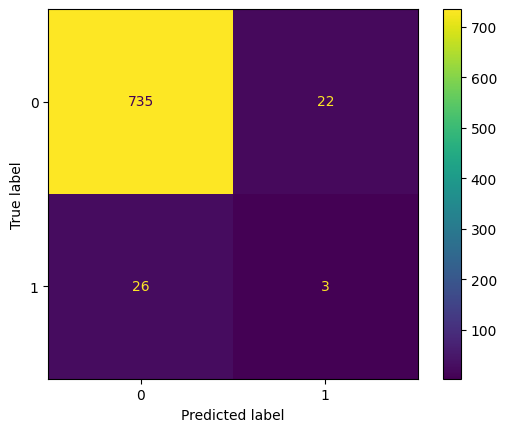

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       757
           1       0.12      0.10      0.11        29

    accuracy                           0.94       786
   macro avg       0.54      0.54      0.54       786
weighted avg       0.93      0.94      0.94       786

Split 2:



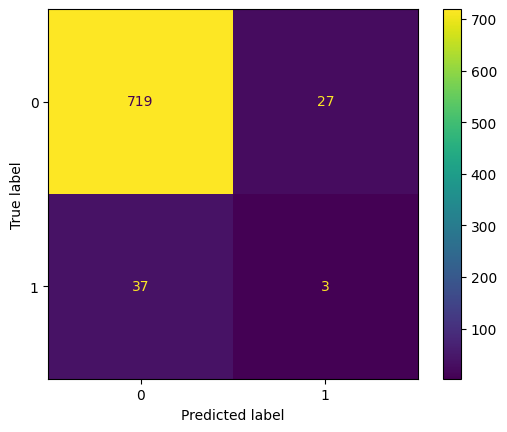

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       746
           1       0.10      0.07      0.09        40

    accuracy                           0.92       786
   macro avg       0.53      0.52      0.52       786
weighted avg       0.91      0.92      0.91       786

Split 3:



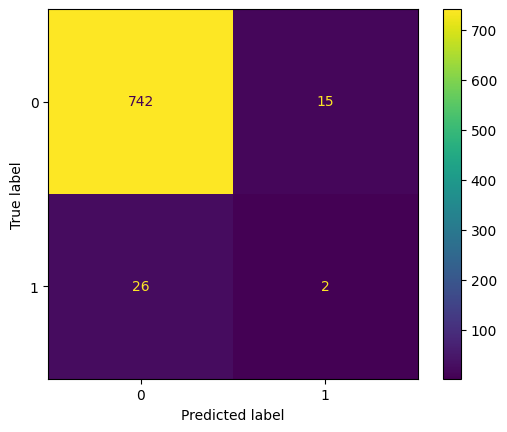

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       757
           1       0.12      0.07      0.09        28

    accuracy                           0.95       785
   macro avg       0.54      0.53      0.53       785
weighted avg       0.94      0.95      0.94       785

Split 4:



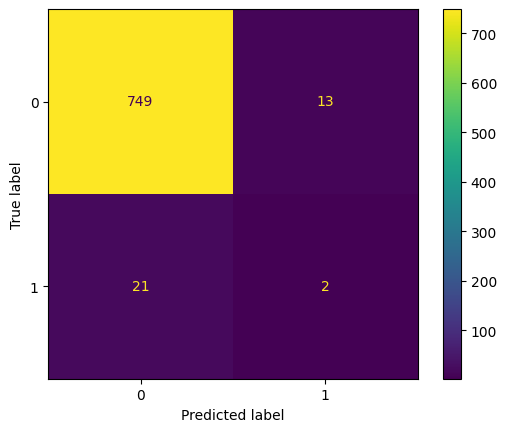

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       762
           1       0.13      0.09      0.11        23

    accuracy                           0.96       785
   macro avg       0.55      0.53      0.54       785
weighted avg       0.95      0.96      0.95       785

Split 5:



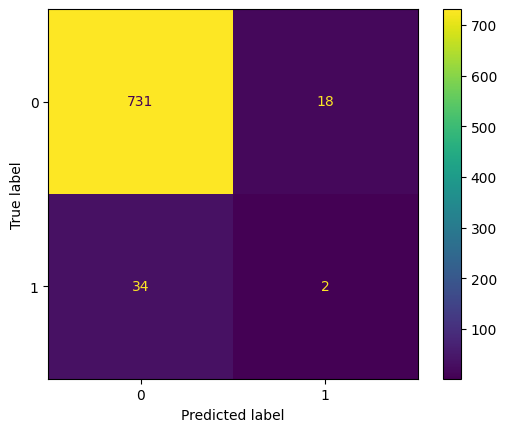

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       749
           1       0.10      0.06      0.07        36

    accuracy                           0.93       785
   macro avg       0.53      0.52      0.52       785
weighted avg       0.92      0.93      0.92       785



In [239]:
data = stroke_df.drop(columns="stroke")
targets = stroke_df["stroke"]

x, x_test, y, y_test = train_test_split(data, targets, test_size=0.2, random_state=42)
# to allow for multi-indexing
x = x.to_numpy()
y = y.to_numpy()

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=2000)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scaler = StandardScaler()


for i, (train_idxs, test_idxs) in enumerate(k_fold.split(x), 1):
    print(f"Split {i}:\n")

    x_train = x[train_idxs]
    x_test = x[test_idxs]
    y_train = y[train_idxs]
    y_test = y[test_idxs]

    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    mlp.fit(x_train, y_train)
    predictions = mlp.predict(x_test)

    conf_mat = confusion_matrix(y_test, predictions)
    norm_conf_mat = confusion_matrix(y_test, predictions, normalize = 'true')

    conf_mat_display = ConfusionMatrixDisplay(conf_mat)
    conf_mat_display.plot()
    plt.show()

    print(classification_report(y_test, predictions))


